In [ ]:
#Analisis exploratorio trocafone - Bárbara

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/home/barbara/Documentos/datos/tarea/fiuba-trocafone-tp1-final-set/events.csv')

/home/barbara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(df)

1011288

In [5]:
df.sample(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
575223,2018-06-14 02:20:21,checkout,9339f2d1,NaN,2710,iPhone 5,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [ ]:
#Limpiamos los datos

In [2]:
# Le agregamos 3 columnas, una de año, otra de dia de la semana y otra de hora.
import calendar
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Year'] = df['timestamp'].map(lambda x:x.year)
df['Weekday'] = df['timestamp'].map(lambda x:x.weekday_name)
df['Hour'] = pd.to_datetime(df['timestamp'], format='%H:%M',errors='coerce').dt.hour




/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


In [3]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = df['Weekday'].astype('category', categories=cats, ordered=True)

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011288 entries, 0 to 1011287
Data columns (total 26 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region            

Text(0,0.5,'Eventos')

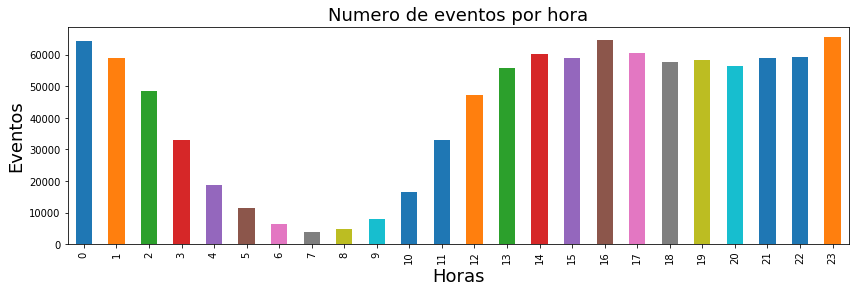

In [4]:
# Numero de eventos por hora
plotEH = df.groupby('Hour').count()['event'].plot(kind='bar',figsize=(14,4));

plotEH.set_title("Numero de eventos por hora", fontsize=18)
plotEH.set_xlabel("Horas",fontsize=18)
plotEH.set_ylabel("Eventos", fontsize=18)


Text(0,0.5,'Eventos')

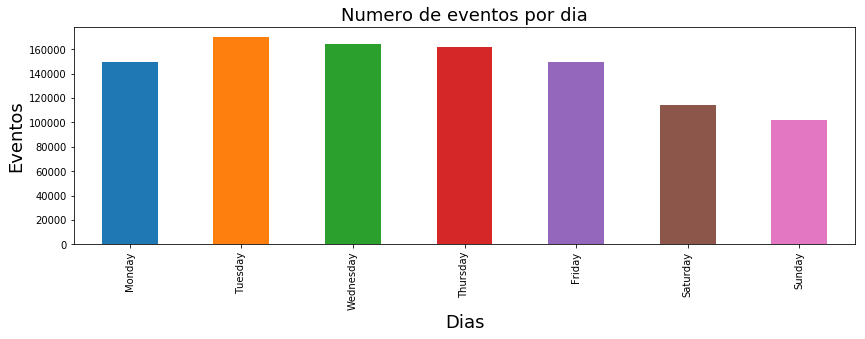

In [5]:
# Numero de eventos por dia
# Hay que agregarle los dias de la semana ¿Como? PD: Estan ordenados de lunes a domingos.
plotED=df.groupby('Weekday').count()['event'].plot(kind='bar',figsize=(14,4));

plotED.set_title("Numero de eventos por dia", fontsize=18)
plotED.set_xlabel("Dias",fontsize=18)
plotED.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

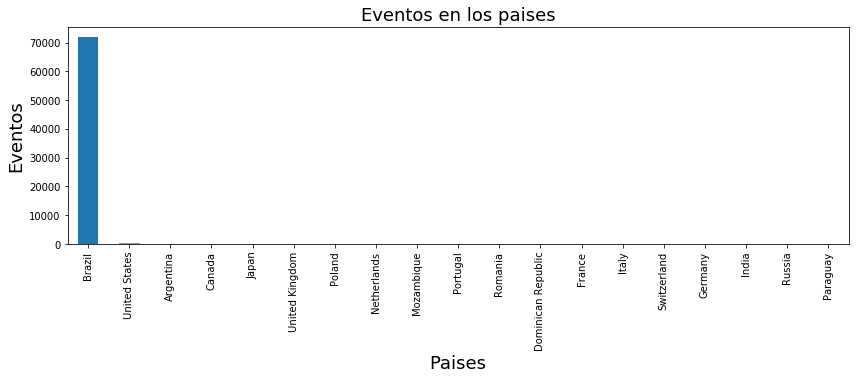

In [32]:
#paises y eventos
dfFiltrado = df.loc[df['region'] != 'Unknown', :]
plotC=dfFiltrado['country'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotC.set_title("Eventos en los paises", fontsize=18)
plotC.set_xlabel("Paises",fontsize=18)
plotC.set_ylabel("Eventos", fontsize=18)



Text(0,0.5,'Eventos')

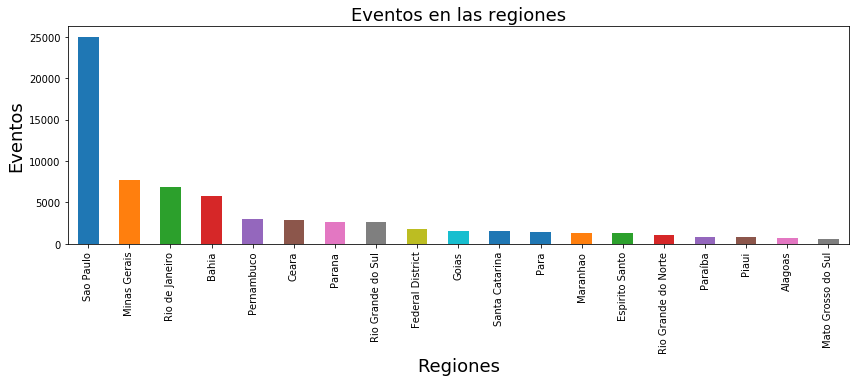

In [30]:
#regiones y eventos
dfFiltrado = df.loc[df['region'] != 'Unknown', :]
plotR=dfFiltrado['region'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotR.set_title("Eventos en las regiones", fontsize=18)
plotR.set_xlabel("Regiones",fontsize=18)
plotR.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

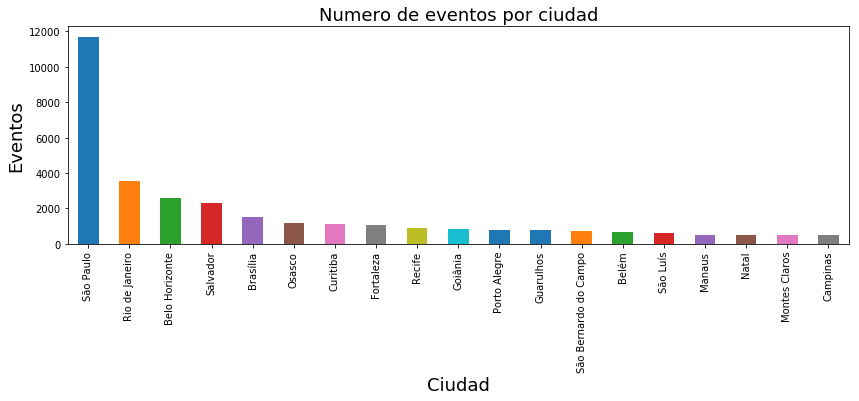

In [18]:
#ciudades y eventos
dfFiltrado = df.loc[df['city'] != 'Unknown', :]
plotF=dfFiltrado['city'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));

plotF.set_title("Numero de eventos por ciudad", fontsize=18)
plotF.set_xlabel("Ciudad",fontsize=18)
plotF.set_ylabel("Eventos", fontsize=18)

In [7]:
compras = df.loc[df.event.str.contains('conversion'),:]
compras
#dataframe de los eventos que son "conversion" (Compras)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,Year,Weekday,Hour
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,17
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Thursday,22
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Sunday,14
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Friday,13
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Friday,22
10005,2018-05-17 02:20:29,conversion,02a6f9b5,NaN,3203,Samsung Galaxy A5,Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Thursday,2
14236,2018-01-09 16:47:50,conversion,03bdcd81,NaN,3301,Samsung Galaxy S6 Edge,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,16
15278,2018-05-15 02:31:34,conversion,042a2a99,NaN,15745,LG K10 Novo,Excelente,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,2
16800,2018-01-23 22:26:36,conversion,04850add,NaN,2830,iPhone 6,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Tuesday,22
18502,2018-01-10 18:59:05,conversion,04fbc241,NaN,6370,Samsung Galaxy J5,Muito Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,Wednesday,18


Text(0,0.5,'Compra')

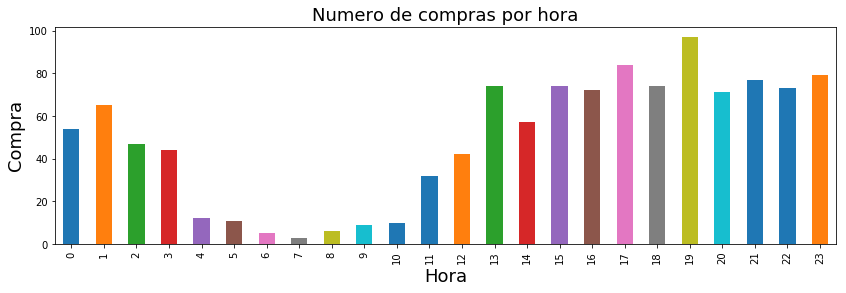

In [8]:

plotH=compras.groupby('Hour').count()['event'].plot(kind='bar',figsize=(14,4));
#numero de compras por hora
plotH.set_title("Numero de compras por hora", fontsize=18)
plotH.set_xlabel("Hora",fontsize=18)
plotH.set_ylabel("Compra", fontsize=18)

Text(0,0.5,'Compras')

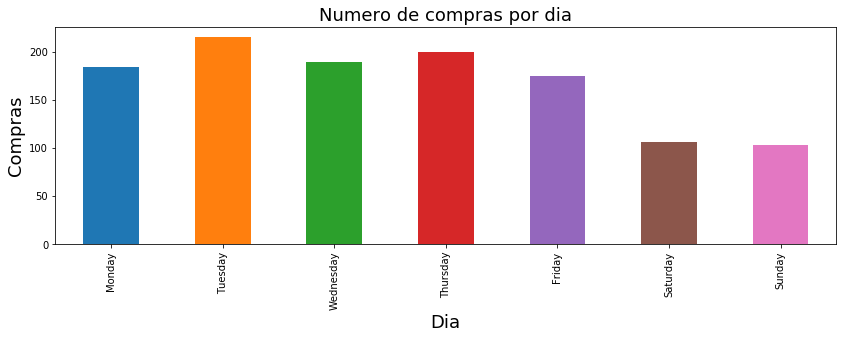

In [9]:
plotD=compras.groupby('Weekday').count()['event'].plot(kind='bar',figsize=(14,4));
plotD.set_title("Numero de compras por dia", fontsize=18)
plotD.set_xlabel("Dia",fontsize=18)
plotD.set_ylabel("Compras", fontsize=18)
#numero de compras por dia de la semana

Text(0,0.5,'Cantidad de eventos')

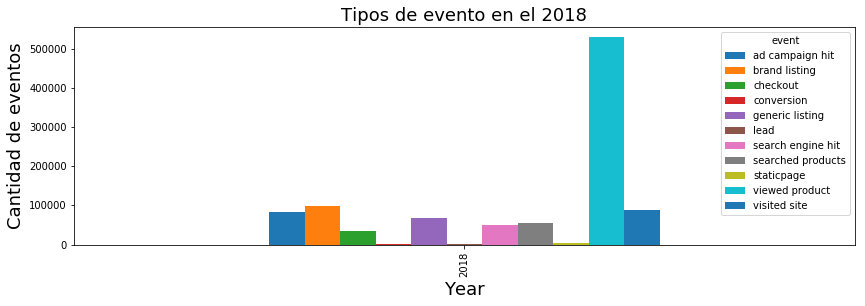

In [29]:
#Analisis por año de los diferentes eventos

# tipo de eventos por año (2018)...

plot=pd.crosstab(df.Year, df.event).plot(kind='bar',figsize=(14,4));
plot.set_title("Tipos de evento en el 2018", fontsize=18)
plot.set_xlabel("Year",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)




In [59]:
pd.crosstab(df.Weekday, df.event)
 

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
Weekday,,,,,,,,,,,
Monday,11902,15067,4621,184,10236,90,7696,8184,658,77653,13094
Tuesday,13757,15997,5928,215,11037,64,8653,8741,724,90410,14494
Wednesday,13357,16202,5772,189,11012,75,8110,8776,574,86051,14205
Thursday,13130,16340,5559,200,10603,60,7646,8551,599,85396,13784
Friday,12395,14731,5244,175,9761,64,7331,8328,464,77947,12931
Saturday,9493,11053,3474,106,7615,45,5871,6586,265,60313,9791
Sunday,8793,9245,3137,103,7270,50,5650,6907,314,51161,9079


Text(0,0.5,'Cantidad de eventos')

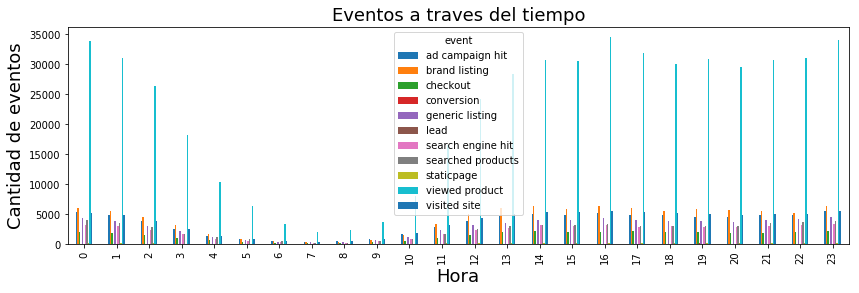

In [10]:
plotHora=pd.crosstab(df.Hour, df.event).plot(kind='bar',figsize=(14,4));
plotHora.set_title("Eventos a traves del tiempo", fontsize=18)
plotHora.set_xlabel("Hora",fontsize=18)
plotHora.set_ylabel("Cantidad de eventos", fontsize=18)

Text(0,0.5,'Cantidad de eventos')

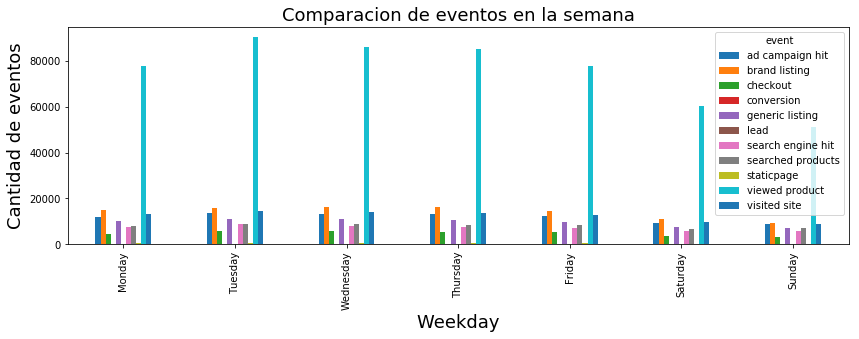

In [11]:

plot=pd.crosstab(df.Weekday, df.event).plot(kind='bar',figsize=(14,4));
plot.set_title("Comparacion de eventos en la semana", fontsize=18)
plot.set_xlabel("Weekday",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)

Text(0,0.5,'Cantidad de eventos')

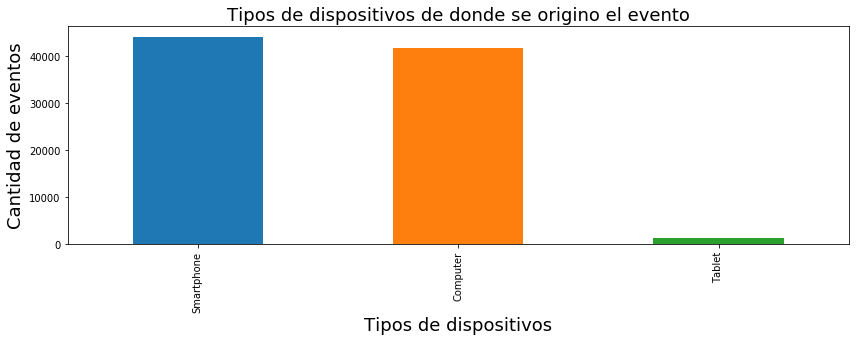

In [66]:
# tipos de dispositivos de donde se origino el evento

dfFiltrado = df.loc[df['device_type'] != 'NaN', :]
dfFiltrado = df.loc[df['device_type'] != 'Unknown', :]

plotCEL=dfFiltrado['device_type'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCEL.set_title("Tipos de dispositivos de donde se origino el evento", fontsize=18)
plotCEL.set_xlabel("Tipos de dispositivos",fontsize=18)
plotCEL.set_ylabel("Cantidad de eventos", fontsize=18)


In [80]:
pd.crosstab(df.device_type,df.event)
# Lista de eventos, en este caso solo se lista visited site.

event,visited site
device_type,
Computer,41790
Smartphone,44239
Tablet,1234
Unknown,115


Text(0,0.5,'Cantidad de eventos')

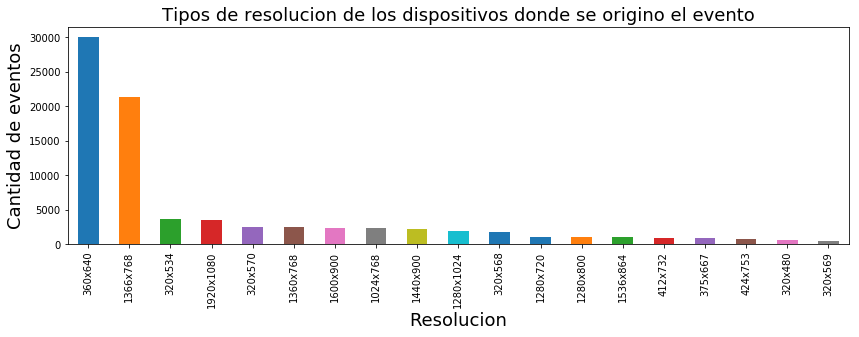

In [5]:
#tipos de resoluciones de los dispositivos donde se origino el evento
dfFiltradoR = df.loc[df['screen_resolution'] != 'NaN', :]
dfFiltradoR = df.loc[df['screen_resolution'] != 'Unknown', :]
plotCELR=dfFiltradoR['screen_resolution'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCELR.set_title("Tipos de resolucion de los dispositivos donde se origino el evento", fontsize=18)
plotCELR.set_xlabel("Resolucion",fontsize=18)
plotCELR.set_ylabel("Cantidad de eventos", fontsize=18)


In [79]:
pd.crosstab(df.screen_resolution,df.event)

event,visited site
screen_resolution,
1000x750,1
1007x569,1
1012x569,1
1024x1024,10
1024x552,4
1024x576,8
1024x600,317
1024x615,2
1024x640,4


Text(0,0.5,'Cantidad de eventos')

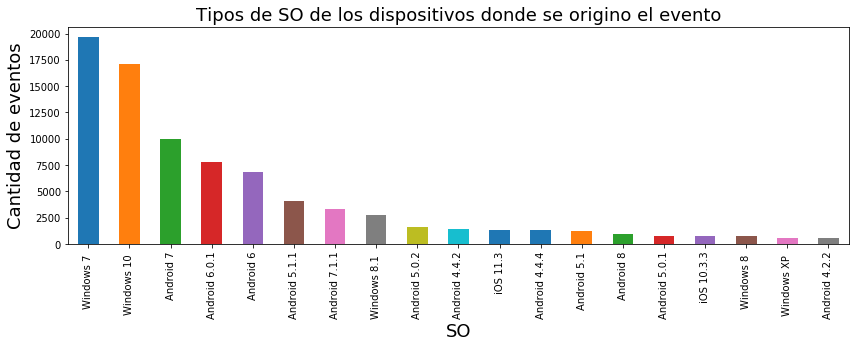

In [6]:
# tipos de so de los dispositivos donde se origino el evento. 
dfFiltradoSO = df.loc[df['operating_system_version'] != 'NaN', :]
dfFiltradoSO = df.loc[df['operating_system_version'] != 'Unknown', :]
plotCELSO=dfFiltradoSO['operating_system_version'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCELSO.set_title("Tipos de SO de los dispositivos donde se origino el evento", fontsize=18)
plotCELSO.set_xlabel("SO",fontsize=18)
plotCELSO.set_ylabel("Cantidad de eventos", fontsize=18)

In [78]:
pd.crosstab(df.operating_system_version,df.event)
#Se detallan los tipos de eventos, en este caso, solo visited site se encuentra en la lista.

event,visited site
operating_system_version,
Android,16
Android 2.3.6,8
Android 3.1,2
Android 3.2,1
Android 4.0.3,1
Android 4.0.4,53
Android 4.1.1,5
Android 4.1.2,519
Android 4.2.2,566


Text(0,0.5,'Cantidad de eventos')

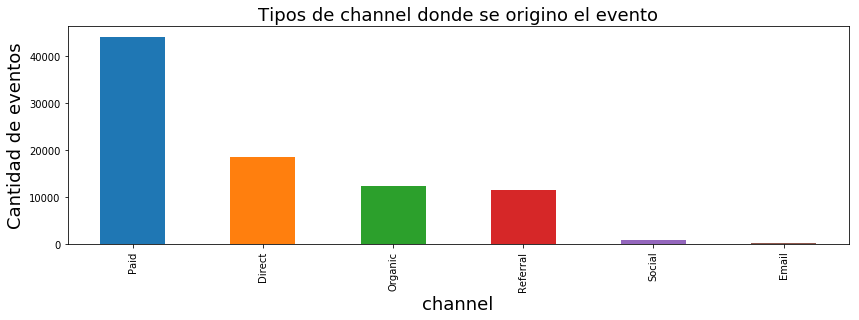

In [7]:
#Tipo de canal donde se origino el evento
dfFiltradoCH = df.loc[df['channel'] != 'NaN', :]
dfFiltradoCH = dfFiltradoCH.loc[df['channel'] != 'Unknown', :]
plotCH=dfFiltradoCH['channel'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCH.set_title("Tipos de channel donde se origino el evento", fontsize=18)
plotCH.set_xlabel("channel",fontsize=18)
plotCH.set_ylabel("Cantidad de eventos", fontsize=18)


In [77]:
pd.crosstab(df.channel,df.event)
#Se detalla el tipo de evento , en este caso es para visitar el sitio

event,visited site
channel,
Direct,18522
Email,76
Organic,12348
Paid,44193
Referral,11384
Social,846
Unknown,9


Text(0,0.5,'Cantidad de eventos')

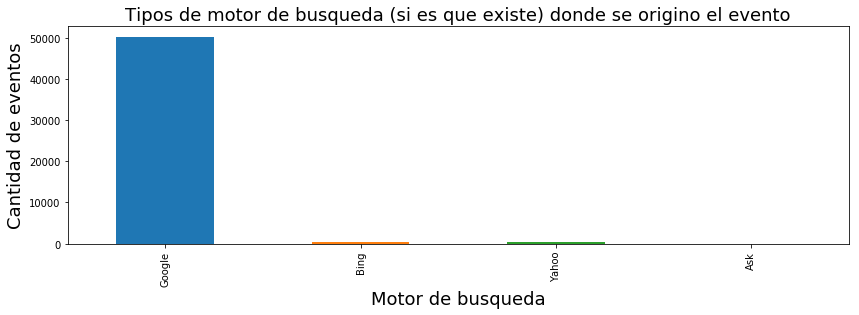

In [10]:
#Si es que viene de un motor de busqueda, ¿de cual?

dfFiltradoSE = df.loc[df['search_engine'] != 'NaN', :]
dfFiltradoSE = dfFiltradoSE.loc[df['search_engine'] != 'Unknown', :]
plotSE=dfFiltradoSE ['search_engine'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotSE.set_title("Tipos de motor de busqueda (si es que existe) donde se origino el evento", fontsize=18)
plotSE.set_xlabel("Motor de busqueda",fontsize=18)
plotSE.set_ylabel("Cantidad de eventos", fontsize=18)

In [38]:
pd.crosstab(df.search_engine,df.event)
#podemos ver que el usuario ingresa al sitio mediante un motor de búsqueda web.
#se detallan a continuacion los motores de busqueda contra los tipos de eventos.


event,search engine hit
search_engine,
Ask,6
Bing,424
Google,50240
Yahoo,287


Text(0,0.5,'Cantidad de eventos')

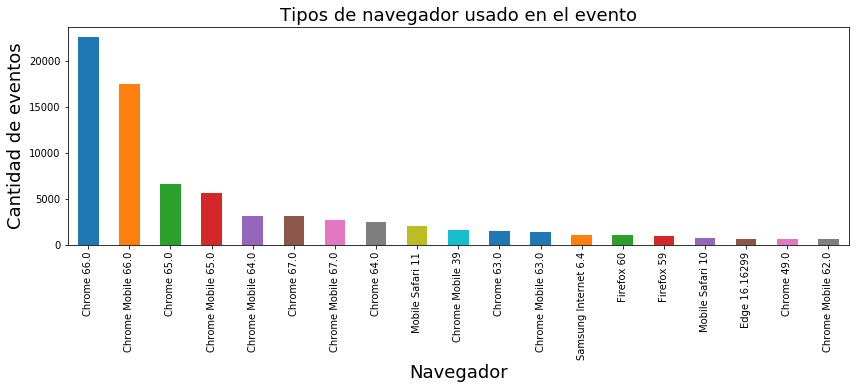

In [75]:
#tipo de navegador usado en el evento

dfFiltradoBV = df.loc[df['browser_version'] != 'NaN', :]
dfFiltradoBV = dfFiltradoBV.loc[df['browser_version'] != 'Unknown', :]
plotBV=dfFiltradoBV ['browser_version'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotBV.set_title("Tipos de navegador usado en el evento", fontsize=18)
plotBV.set_xlabel("Navegador",fontsize=18)
plotBV.set_ylabel("Cantidad de eventos", fontsize=18)


In [76]:
pd.crosstab(df.browser_version,df.event)
#diferentes tipos de eventos x (visited site) contra navegador usado

event,visited site
browser_version,
Amazon Silk 66.3,3
Android 2.3,6
Android 3.1,2
Android 3.2,1
Android 4.0,45
Android 4.1,67
Android 4.2,55
Android 4.3,15
Android 4.4,100
